In [1]:
import numpy as np
import seaborn as sns
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# 1. Ознакомьтесь с набором данных mpg из библиотеки Seaborn. (df =sns.load_dataset(’mpg’))

Набор данных MPG содержит информацию о милях на галлон для различных моделей автомобилей и их атрибутах. Он включает такие характеристики, как мили на галлон, количество цилиндров в двигателе, рабочий объем двигателя, мощность двигателя, вес автомобиля, ускорение, год выпуска модели, происхождение автомобиля и название модели автомобиля.

Особенности и характеристики
  * mpg : миль на галлон (числовое значение)
  * цилиндры : Количество цилиндров в двигателе (числовое)
  * объем : объем двигателя в кубических дюймах (числовой)
  * лошадиная сила : Мощность двигателя в лошадиных силах (числовая)
  * вес : Вес транспортного средства в фунтах (числовой)
  * ускорение : Ускорение в секундах от 0 до 60 миль/ч (числовое)
  * model_year : Год выпуска модели (категориальный)
  * origin : Происхождение автомобиля (1 = американское, 2 = европейское, 3 = японское) (категориальное)
  * имя : Название модели автомобиля (строка)

In [2]:
# Ознакомьтесь с набором данных mpg из библиотеки Seaborn. (df =sns.load_dataset(’mpg’))
df =sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# 2. Посчитайте количество строк и столбцов

In [28]:

print(f'Количество столбцов в наборе: {len(df.columns)}')
print(f'Количество строк в наборе: {len(df.index)}')

Количество столбцов в наборе: 9
Количество строк в наборе: 398


# 3. Проведите разведочный анализ

То есть:
  * для каждой числовой переменной вычислите:
      * Долю пропусков
      * Максимальное и минимальное значение
      * Среднее значение
      * Медиану
      * Дисперсию
      * Квантиль 0.1 и 0.9
      * Квартиль 1 и 3
  * для каждой категориальной переменной вычислите:
      * Долю пропусков
      * Количество уникальных значений
      * Моду

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Для большинства столбцов отношение к числовым или категориальным переменным можно сделать по типу данных.
Столбцы `['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']` - числовые. 
Столбцы `['origin', 'name']` - категориальные.
Особым образом стоит рассмотреть столбец model_year. По сути это своеобразная шкала времени. И этот столбец можно рассматривать и как числовой, и как категориальный - зависит от задачи.

In [75]:
# Добавим столбец, в котором год выпуска представлен как строка
df["model_year_str"] = df["model_year"].apply(str) 

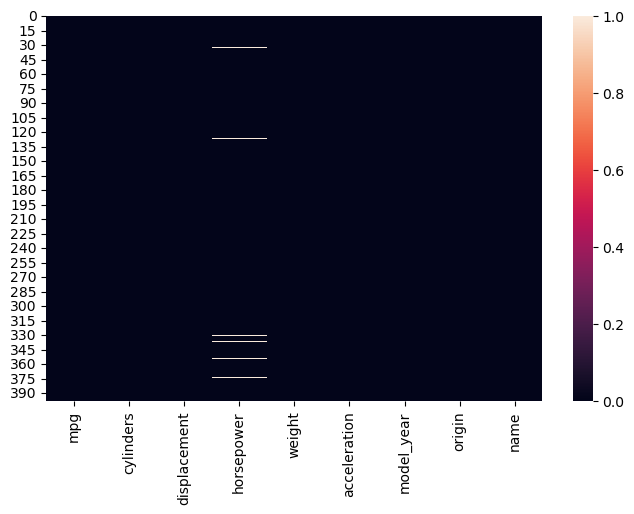

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isna())
plt.show()

Небольшое количество пропусков есть только у столбца horsepower.

In [26]:
print(f"  Доля пропусков в столбце horsepower (%): {len(df[df['horsepower'].isna()])/len(df)*100:2.3f}")

  Доля пропусков в столбце horsepower (%): 1.508


In [41]:
# Числовые: Максимальное и минимальное значение, Среднее значение, Медиану, Квантиль 0.1 и 0.9, Квартиль 1 и 3
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
10%,14.000000,4.000000,90.000000,67.000000,1988.500000,12.000000,71.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
90%,34.330000,8.000000,350.000000,157.700000,4275.200000,19.000000,81.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [63]:
# Дисперсию
num_columns = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
print("Дисперсия: ")
for column in num_columns:
    print(f"  {column}:  {df[column].var():.4f}")

Дисперсия: 
  mpg:  61.0896
  cylinders:  2.8934
  displacement:  10872.1992
  horsepower:  1481.5694
  weight:  717140.9905
  acceleration:  7.6048
  model_year:  13.6724


In [77]:
# Категориальные: Количество уникальных значений, моду
df.describe(include=['O'])

,origin,name,model_year_str
count,398,398,398
unique,3,305,13
top,usa,ford pinto,73
freq,249,6,40


# 3. Сформулируйте и проверьте минимум 2 статистические гипотезы. 

Выбор критериев для проверки гипотез требуется обосновать. Сделать выводы в терминах предметной области.

In [67]:
df1 = df[['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year']]
#df_minmax=preprocessing.MinMaxScaler().fit_transform(df1)
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df1), 
                          columns=['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'])
df_minmax

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0
...,...,...,...,...,...,...,...
393,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0
394,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0
395,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0
396,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0


<Axes: >

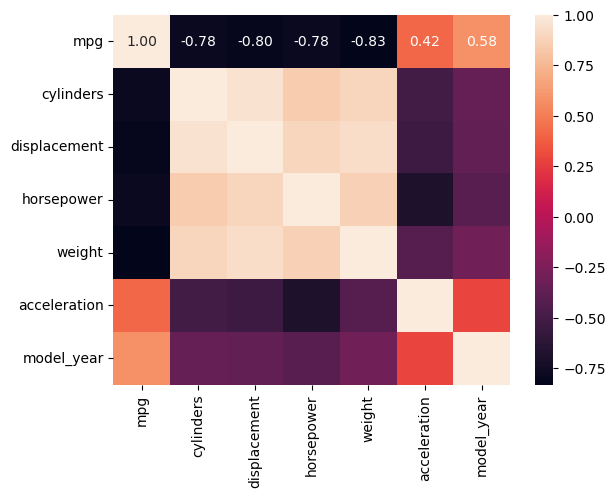

In [69]:
cor =df_minmax.corr(numeric_only = True)
sns.heatmap(cor, annot=True, fmt='.2f')

In [25]:
def check_pvalue(pvalue):
    if pvalue < 0.05:
        print("H0 отвергаем")
    else:
        print("Не можем отвергнуть H0")

## 3.1 Проверка распределения столбца mpg
Требуется, чтобы понять как проверять следующую гипотезу.

H0: mpg подчиняется нормальному распределению \
H1: mpg не подчиняется нормальному распределению

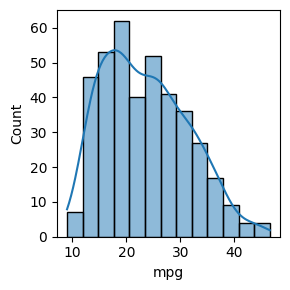

In [35]:
plt.figure(figsize=(3,3),facecolor='white')
#pltno =1
#plt.subplot(3,3,pltno)
sns.histplot(x=df["mpg"], kde=True)
#pltno=pltno+1
plt.tight_layout()

In [37]:
res = scipy.stats.shapiro(df["mpg"])
print(res)
check_pvalue(res.pvalue)

ShapiroResult(statistic=0.9679659577379658, pvalue=1.1833854157896544e-07)
H0 отвергаем


In [38]:
res = scipy.stats.kstest(df["mpg"], 'norm')
print(res) # вывод результата
check_pvalue(res.pvalue)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.0, statistic_sign=-1)
H0 отвергаем


## 3.2. Сравнение mpg автомобилей usa и europe+japan
Есть гипотеза, что американские автомобили менее экономичны, чем европейские и японские
H0: среднее mpg автомобилей usa одинаково с mpg автомобилей europe+japan \
H1: среднее mpg автомобилей europe+japan лучше (больше) чем mpg автомобилей usa

In [52]:
df_usa = df[df["origin"]=="usa"]
df_ej = df[df["origin"]!="usa"]

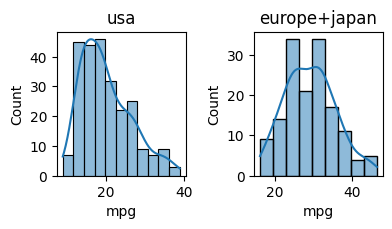

In [53]:
plt.figure(figsize=(6,6),facecolor='white')
pltno =1
plt.subplot(3,3,1, title="usa")
sns.histplot(x=df_usa["mpg"], kde=True)
plt.subplot(3,3,2, title="europe+japan")
sns.histplot(x=df_ej["mpg"], kde=True)
#pltno=pltno+1
plt.tight_layout()

In [54]:
res = scipy.stats.mannwhitneyu(df_usa["mpg"], df_ej["mpg"], alternative = "greater")
print(res) # вывод результата
check_pvalue(res.pvalue)

MannwhitneyuResult(statistic=5852.5, pvalue=1.0)
Не можем отвергнуть H0


## 3.3 Проверка распределения столбца acceleration
Требуется, чтобы понять как проверять следующую гипотезу.

H0: acceleration подчиняется нормальному распределению \
H1: acceleration не подчиняется нормальному распределению

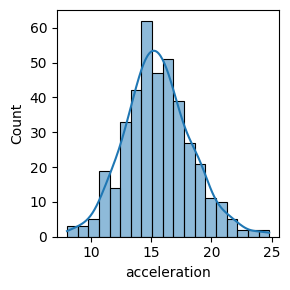

In [55]:
plt.figure(figsize=(3,3),facecolor='white')
#pltno =1
#plt.subplot(3,3,pltno)
sns.histplot(x=df["acceleration"], kde=True)
#pltno=pltno+1
plt.tight_layout()

In [56]:
res = scipy.stats.shapiro(df["acceleration"])
print(res)
check_pvalue(res.pvalue)

ShapiroResult(statistic=0.9923786617732914, pvalue=0.03986944421633885)
H0 отвергаем


In [64]:
res = scipy.stats.kstest(df["acceleration"], 'norm')
print(res)
check_pvalue(res.pvalue)

KstestResult(statistic=0.9999999999999993, pvalue=0.0, statistic_location=8.0, statistic_sign=-1)
H0 отвергаем


## 3.4. Сравнение acceleration автомобилей с разным количеством цилиндров
Есть гипотеза, что большое количество цилиндров (более 4) дает более высокое ускорение
H0: среднее acceleration автомобилей с >4 цилиндрами одинаково с acceleration автомобилей с количеством цилиндров <=4
H1: среднее acceleration автомобилей с >4 цилиндрами выше acceleration автомобилей с количеством цилиндров <=4

In [59]:
df_68 = df[df["cylinders"]>4]
df_14 = df[df["cylinders"]<=4]

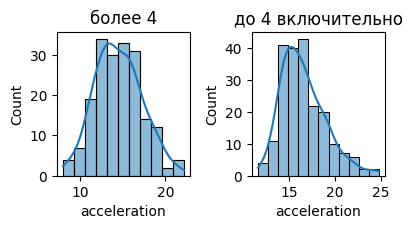

In [60]:
plt.figure(figsize=(6,6),facecolor='white')
pltno =1
plt.subplot(3,3,1, title="более 4")
sns.histplot(x=df_68["acceleration"], kde=True)
plt.subplot(3,3,2, title="до 4 включительно")
sns.histplot(x=df_14["acceleration"], kde=True)
plt.tight_layout()

In [69]:
res = scipy.stats.mannwhitneyu(df_68["acceleration"], df_14["acceleration"], alternative = "greater")
print(res) 
check_pvalue(res.pvalue)

MannwhitneyuResult(statistic=11513.0, pvalue=0.9999999999996937)
Не можем отвергнуть H0


## 3.3. Чем больше объем двигателя, тем выше ускорение. 

Ускорение во многом зависит от крутящего момента, который, в свою очередь, во многом зависит от объема двигателя, т.к. объем двигателя определяет объем топлива, сгораемого в моменте.

H0: При увеличении объема двигателя ускорение не меняется \
H1: При увеличении объема двигателя ускорение растет

In [85]:
d = df[['acceleration', 'displacement', 'mpg']].dropna()

In [89]:
column2 = 'acceleration'
column1 = 'displacement'
#column2 = 'mpg'

res = scipy.stats.pearsonr(d[column1], d[column2], alternative='greater')
print(res) 
check_pvalue(res.pvalue)

res = scipy.stats.spearmanr(d[column1], d[column2], alternative='greater')
print(res) 
check_pvalue(res.pvalue)

res = scipy.stats.kendalltau(d[column1], d[column2], alternative='greater')
print(res) 
check_pvalue(res.pvalue)

PearsonRResult(statistic=-0.5436840835009298, pvalue=1.0)
Не можем отвергнуть H0
SignificanceResult(statistic=-0.49651192134583266, pvalue=1.0)
Не можем отвергнуть H0
SignificanceResult(statistic=-0.35210980075634984, pvalue=1.0)
Не можем отвергнуть H0


На основании коэффициентов каждого теста и полученного p-value можно сделать вывод, что зависимость ускорения от объема двигателя (чем больше объем - тем выше ускорение) есть, но умеренная.

# 4. Реализуйте стохастический и обычный градиентный спуск вручную для этих данных:y=’mpg’ иx=’horsepower’ и ’weight’

In [90]:
df_mpg_weight = df[['mpg', 'weight']]
df_mpg_weight[['mpg_minmax', 'weight_minmax']]  = preprocessing.MinMaxScaler().fit_transform(df[['mpg', 'weight']])

<Axes: >

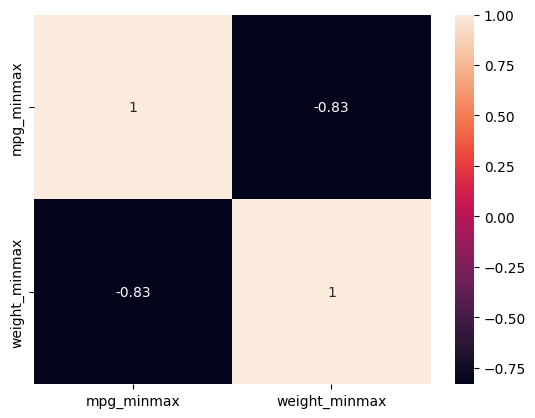

In [91]:
sns.heatmap(df_mpg_weight[['mpg_minmax', 'weight_minmax']].corr( numeric_only = True),annot=True)

<Axes: xlabel='weight', ylabel='mpg'>

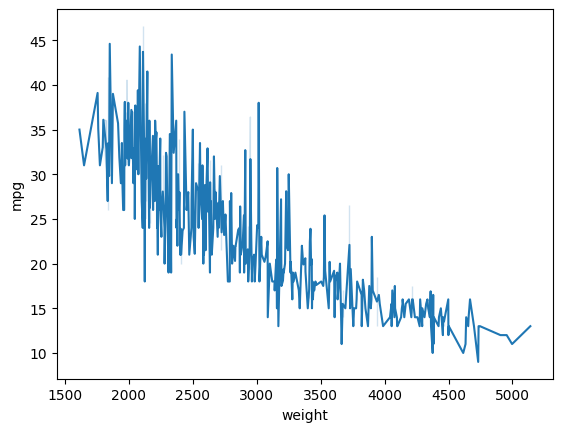

In [92]:
sns.lineplot(y='mpg',x='weight', data=df_mpg_weight)

<Axes: xlabel='weight_minmax', ylabel='mpg_minmax'>

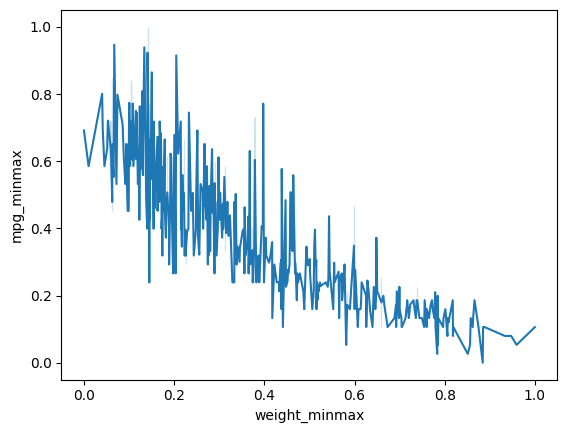

In [93]:
sns.lineplot(y='mpg_minmax',x='weight_minmax', data=df_mpg_weight)

## 4.1 Стохастический градиентный спуск с х=horsepower

In [104]:
def my_sgd(x, y, x_orig, y_orig,interation, seed, learning_rate):
    np.random.seed(seed)
    # Начальные значения параметров
    a_n = np.random.randn()
    b_n = np.random.randn()
    m = len(x)
    #print(f'a_n={a_n}, b_n={b_n}')

    # Хранение значений параметров для визуализации
    a_history = [a_n]
    b_history = [b_n]
    
    # Стохастический градиентный спуск
    for i in range(interation):
        rand_index = np.random.randint(m)
        x_i = x[rand_index]
        y_i = y[rand_index]
        y_pred = a_n * x_i + b_n
        error = y_pred - y_i
        a_gradient = 2 * x_i * error
        b_gradient = 2 * error
        a_n = a_n - learning_rate * a_gradient
        b_n = b_n - learning_rate * b_gradient
        a_history.append(a_n)
        b_history.append(b_n)
        #print(f'rand_index={rand_index}, x_i={x_i}, y_i={y_i}, x_orig_i={x_orig[rand_index]}, y_orig_i={y_orig[rand_index]}')

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, a_n * x + b_n, color='red', label='Regression line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(a_history, label='a', color='green')
    plt.plot(b_history, label='b', color='purple')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()
    plt.show()
    
    
    a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
    b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)
    
    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * x + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)
    
    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a_history, b_history, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of MSE')
    plt.colorbar(label='MSE')
    
    plt.tight_layout()
    plt.show()

    #print(f"Минимум достигается при x1={x1_history[-1]:.4f}, x2={x2_history[-1]:.4f}")
    #print(f"Значение функции в точке минимума = {f(x1_history[-1], x2_history[-1])}:.4f)")

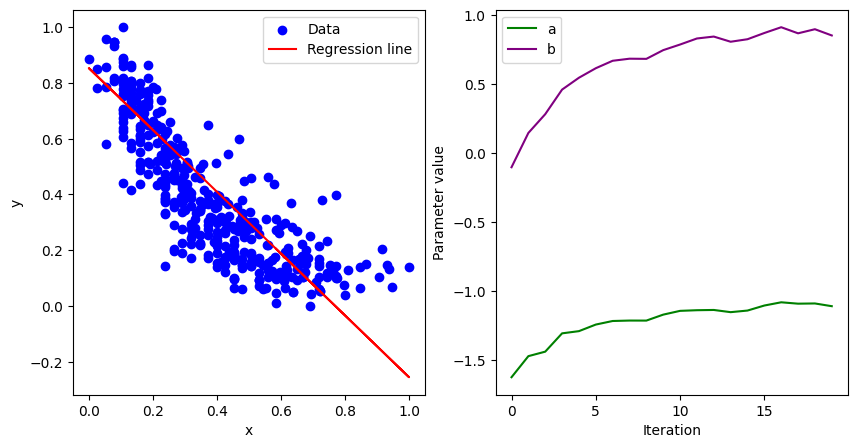

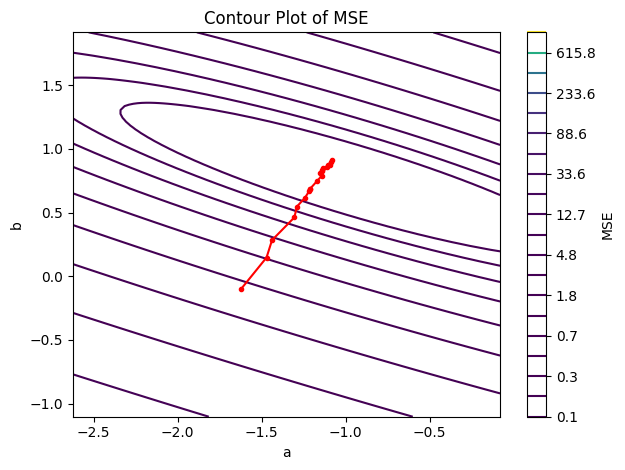

In [105]:
my_sgd(df_mpg_weight["mpg_minmax"], df_mpg_weight["weight_minmax"], 
       df_mpg_weight["weight"], df_mpg_weight["mpg"],
       interation=19, seed=55, learning_rate=0.1)

## 4.2 Градиентный спуск

In [106]:
def my_gd(x, y, x_orig, y_orig, n_interation=0.1, seed=42, learning_rate=20):
    # Начальные значения параметров
    a_n = np.random.randn(1)
    b_n = np.random.randn(1)
    learning_rate = 0.1
    n_iterations = 20
    m = len(x)

    # Хранение значений параметров для визуализации
    a_history = [a_n]
    b_history = [b_n]

    # Градиентный спуск
    for iteration in range(n_iterations):
        y_pred = a_n * x + b_n
        error = y_pred - y
        a_gradient = 2/m * np.sum(x * error)
        b_gradient = 2/m * np.sum(error)
        a_n = a_n - learning_rate * a_gradient
        b_n = b_n - learning_rate * b_gradient
        a_history.append(a_n)
        b_history.append(b_n)

    plt.figure(figsize=(10, 5))


    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, a_n * x + b_n, color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(a_history, label='a', color='green')
    plt.plot(b_history, label='b', color='purple')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(5, 5))
    a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
    b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)

    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * x + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)

    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a_history, b_history, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of MSE')
    plt.colorbar(label='MSE')

    plt.show()

    #print(f"Минимум достигается при x1={x1_history[-1]:.4f}, x2={x2_history[-1]:.4f}")
    #print(f"Значение функции в точке минимума = {f(x1_history[-1], x2_history[-1])}:.4f)")

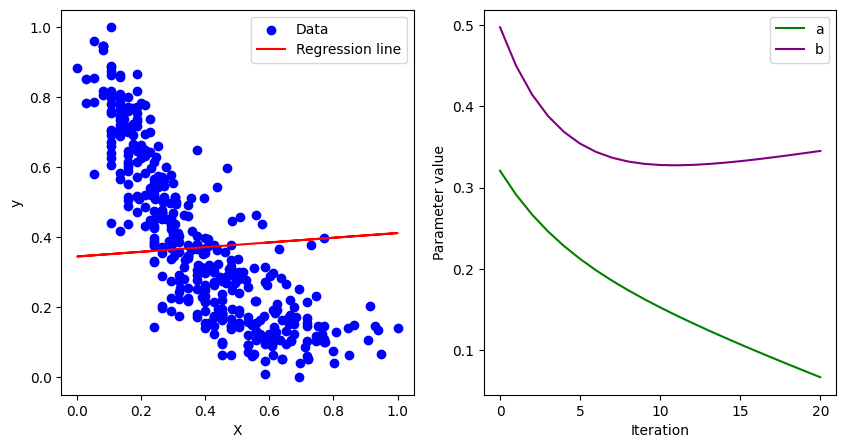

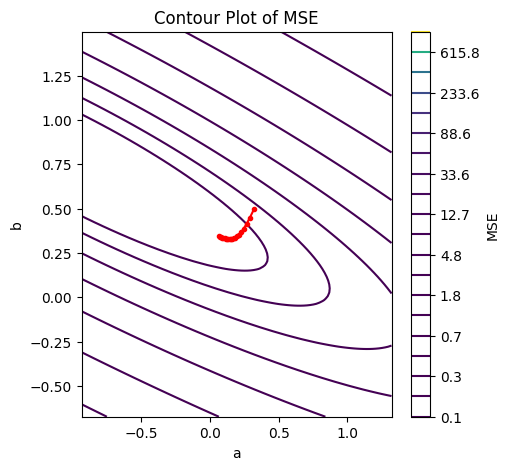

In [103]:
my_gd(df_mpg_weight["mpg_minmax"], df_mpg_weight["weight_minmax"], 
      df_mpg_weight["weight"], df_mpg_weight["mpg"],
      n_interation=19, seed=25, learning_rate=0.1)